#*Sayantan Mukherjee 60009220131 D2-2*

In [ ]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

w = random.uniform(-1, 1)
b = random.uniform(-1, 1)


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))



In [ ]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


In [ ]:
def forward(X, w, b):
    return sigmoid(w * X + b)


In [ ]:
def mean_squared_error(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)


In [ ]:
def train(X, Y, epochs, learning_rate, batch=True):
    global w, b
    errors = []
    accuracies = []
    for epoch in range(epochs):
        if batch:
            Y_pred = forward(X, w, b)
            error = mean_squared_error(Y, Y_pred)
            errors.append(error)

            dw = np.mean((Y_pred - Y) * X * sigmoid_derivative(w * X + b))
            db = np.mean((Y_pred - Y) * sigmoid_derivative(w * X + b))

            w -= learning_rate * dw
            b -= learning_rate * db

            accuracy = 1 - error
            accuracies.append(accuracy)

        else:
            for i in range(len(X)):
                Y_pred = forward(X[i], w, b)
                error = mean_squared_error(Y[i], Y_pred)

                dw = (Y_pred - Y[i]) * X[i] * sigmoid_derivative(w * X[i] + b)
                db = (Y_pred - Y[i]) * sigmoid_derivative(w * X[i] + b)

                w -= learning_rate * dw
                b -= learning_rate * db

                errors.append(error)

                accuracy = 1 - error
                accuracies.append(accuracy)

    return errors, accuracies


In [ ]:
def plot_error_surface(errors, title):
    plt.plot(errors)
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()


In [ ]:
def plot_accuracy(accuracies, title):
    plt.plot(accuracies)
    plt.title(title)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.show()


In [ ]:
epochs = 1000
learning_rate = 0.01

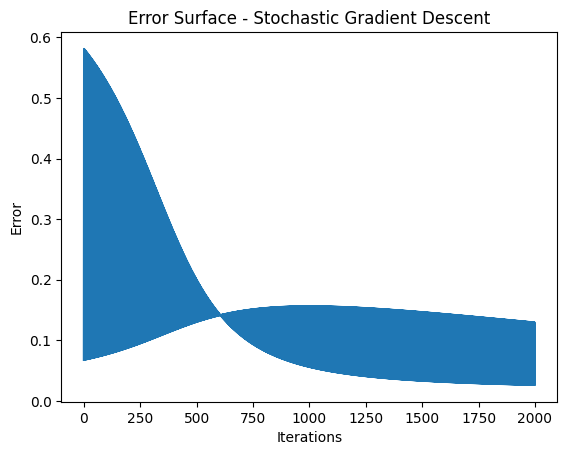

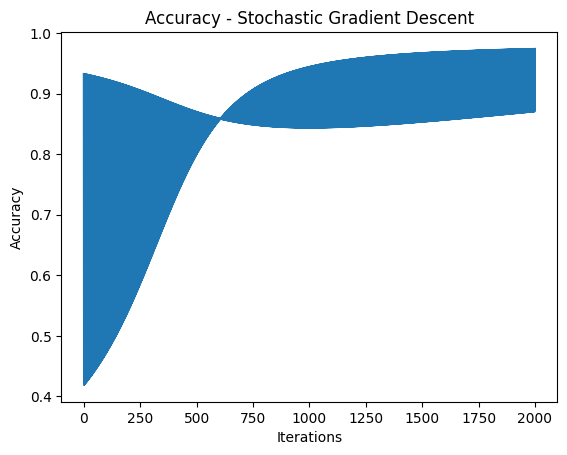

In [ ]:
# Stochastic Gradient Descent
errors_sgd, accuracies_sgd = train(X, Y, epochs, learning_rate, batch=False)
plot_error_surface(errors_sgd, 'Error Surface - Stochastic Gradient Descent')
plot_accuracy(accuracies_sgd, 'Accuracy - Stochastic Gradient Descent')


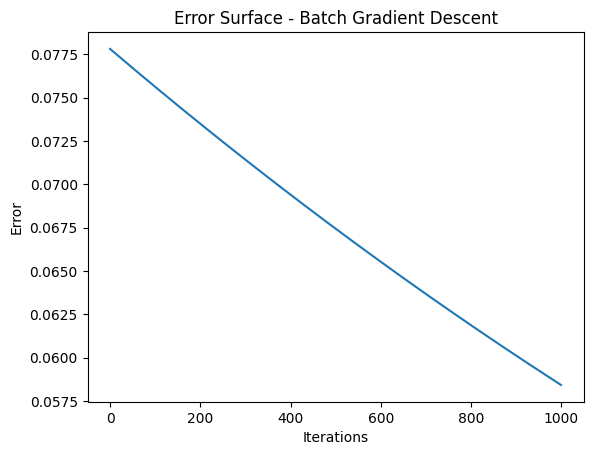

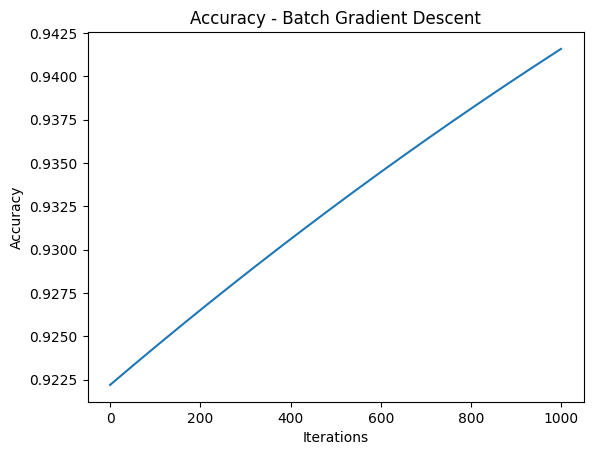

In [ ]:
# Batch Gradient Descent
errors_bgd, accuracies_bgd = train(X, Y, epochs, learning_rate, batch=True)
plot_error_surface(errors_bgd, 'Error Surface - Batch Gradient Descent')
plot_accuracy(accuracies_bgd, 'Accuracy - Batch Gradient Descent')


##*MNIST DATASET*

#*1. Gradient Descent (GD)*
Advantages:

Simple and easy to understand.
Effective for convex loss functions.

Disadvantages:

Can be slow to converge.
Sensitive to learning rate and may get stuck in local minima.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def create_model():
    return {
        'weights': np.random.randn(784, 10) * 0.01,
        'biases': np.zeros(10)
    }

# Define optimizer functions
def gradient_descent(X, Y, model, epochs=10, learning_rate=0.01):
    weights = model['weights']
    biases = model['biases']
    history = {'loss': [], 'accuracy': []}
    for epoch in range(epochs):
        dw = np.zeros_like(weights)
        db = np.zeros_like(biases)
        for x, y in zip(X, Y):
            z = np.dot(x, weights) + biases
            y_hat = 1 / (1 + np.exp(-z))
            error = y - y_hat
            dw += np.outer(x, error)
            db += error
        weights += learning_rate * dw
        biases += learning_rate * db
        # Calculating loss and accuracy using gradient descent
        y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
        loss = -np.mean(Y * np.log(y_pred + 1e-10) + (1 - Y) * np.log(1 - y_pred + 1e-10))
        accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
    return history

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#*2. Stochastic Gradient Descent (SGD)*
Advantage:

Faster convergence due to frequent updates.
Can escape local minima due to noise in updates.

Disadvantage:

High variance in updates, leading to noisy convergence.
Requires careful tuning of learning rate and batch size.

In [ ]:
def stochastic_gradient_descent(X, Y, model, epochs=10, learning_rate=0.01):
    # Stochastic Gradient Descent implementation
    return gradient_descent(X, Y, model, epochs, learning_rate)

#*3. Mini-Batch Gradient Descent*
Advantages:

Balances between GD and SGD, offering faster convergence with more stability.
Efficiently utilizes hardware (e.g., GPU) by processing batches.

Disadvantages:

Still sensitive to batch size and learning rate.
May require more memory for large batches.

In [ ]:
def mini_batch_gradient_descent(X, Y, model, epochs=10, learning_rate=0.01, batch_size=32):
    weights = model['weights']
    biases = model['biases']
    history = {'loss': [], 'accuracy': []}
    for epoch in range(epochs):
        permutation = np.random.permutation(X.shape[0])
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]
        for i in range(0, X.shape[0], batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]
            dw = np.zeros_like(weights)
            db = np.zeros_like(biases)
            for x, y in zip(X_batch, Y_batch):
                z = np.dot(x, weights) + biases
                y_hat = 1 / (1 + np.exp(-z))
                error = y - y_hat
                dw += np.outer(x, error)
                db += error
            weights += learning_rate * dw
            biases += learning_rate * db
        # Calculating loss and accuracy using mini batch gradient
        y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
        loss = -np.mean(Y * np.log(y_pred + 1e-10) + (1 - Y) * np.log(1 - y_pred + 1e-10))
        accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
    return history

#*4. Momentum Gradient Descent*
Advantages:

Accelerates convergence by smoothing out gradients.
Helps overcome local minima and saddle points.

Disadvantages:

Requires tuning of the momentum parameter.
Can introduce oscillations if not properly adjusted.

In [ ]:
def momentum_gd(X, Y, model, epochs=10, learning_rate=0.01, beta=0.9):
    weights = model['weights']
    biases = model['biases']
    m_weights = np.zeros_like(weights)
    m_biases = np.zeros_like(biases)
    history = {'loss': [], 'accuracy': []}
    for epoch in range(epochs):
        dw = np.zeros_like(weights)
        db = np.zeros_like(biases)
        for x, y in zip(X, Y):
            z = np.dot(x, weights) + biases
            y_hat = 1 / (1 + np.exp(-z))
            error = y - y_hat
            dw += np.outer(x, error)
            db += error
        m_weights = beta * m_weights + (1 - beta) * dw
        m_biases = beta * m_biases + (1 - beta) * db
        weights += learning_rate * m_weights
        biases += learning_rate * m_biases
        # Calculating loss and accuracy using momentum gradient
        y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
        loss = -np.mean(Y * np.log(y_pred + 1e-10) + (1 - Y) * np.log(1 - y_pred + 1e-10))
        accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
    return history

#*5. AdaGrad*
Advantages:

Adapts learning rates for each parameter, improving performance on sparse data.
Requires less tuning of the learning rate.

Disadvantages:

Accumulates gradients, which can lead to a diminishing learning rate.
May stop learning prematurely due to rapidly decreasing learning rates.

In [ ]:
def adagrad(X, Y, model, epochs=10, learning_rate=0.01, epsilon=1e-8):
    weights = model['weights']
    biases = model['biases']
    cache_w = np.zeros_like(weights)
    cache_b = np.zeros_like(biases)
    history = {'loss': [], 'accuracy': []}
    for epoch in range(epochs):
        dw = np.zeros_like(weights)
        db = np.zeros_like(biases)
        for x, y in zip(X, Y):
            z = np.dot(x, weights) + biases
            y_hat = 1 / (1 + np.exp(-z))
            error = y - y_hat
            dw += np.outer(x, error)
            db += error
        cache_w += dw ** 2
        cache_b += db ** 2
        weights -= learning_rate * dw / (np.sqrt(cache_w) + epsilon)
        biases -= learning_rate * db / (np.sqrt(cache_b) + epsilon)
        # Calculating loss and accuracy using adagrad
        y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
        loss = -np.mean(Y * np.log(y_pred + 1e-10) + (1 - Y) * np.log(1 - y_pred + 1e-10))
        accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
    return history

#*6. AdaDelta*
Advantages:

Mitigates AdaGrad’s learning rate decay issue using moving averages.
Requires minimal parameter tuning.

Disadvantages:

Computationally more intensive due to additional memory requirements.
The decay parameters need tuning and might not be optimal for all problems.

In [ ]:
def adadelta(X, Y, model, epochs=10, learning_rate=0.001, rho=0.9, epsilon=1e-8):
    weights = model['weights']
    biases = model['biases']
    E_dw2 = np.zeros_like(weights)
    E_db2 = np.zeros_like(biases)
    E_dw = np.zeros_like(weights)
    E_db = np.zeros_like(biases)
    history = {'loss': [], 'accuracy': []}
    for epoch in range(epochs):
        dw = np.zeros_like(weights)
        db = np.zeros_like(biases)
        for x, y in zip(X, Y):
            z = np.dot(x, weights) + biases
            y_hat = 1 / (1 + np.exp(-z))
            error = y - y_hat
            dw += np.outer(x, error)
            db += error
        E_dw2 = rho * E_dw2 + (1 - rho) * dw ** 2
        E_db2 = rho * E_db2 + (1 - rho) * db ** 2
        delta_w = -dw / (np.sqrt(E_dw2) + epsilon)
        delta_b = -db / (np.sqrt(E_db2) + epsilon)
        weights += learning_rate * delta_w
        biases += learning_rate * delta_b
        # Calculating loss and accuracy using adadelta
        y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
        loss = -np.mean(Y * np.log(y_pred + 1e-10) + (1 - Y) * np.log(1 - y_pred + 1e-10))
        accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
    return history


#*7.Nesterov Accelerated Gradient (NAG)*
Advantages:

Faster Convergence: Improved speed and accuracy in reaching the optimum.
Better Generalization: Less oscillation and more stable updates.

Disadvantages:

Implementation Complexity: More complex than standard momentum.
Parameter Sensitivity: Requires careful tuning of momentum and learning rate.

In [ ]:
def nag_gd(X, Y, model, epochs=10, learning_rate=0.01, beta=0.9):
    weights = model['weights']
    biases = model['biases']
    m_weights = np.zeros_like(weights)
    m_biases = np.zeros_like(biases)
    history = {'loss': [], 'accuracy': []}
    for epoch in range(epochs):
        dw = np.zeros_like(weights)
        db = np.zeros_like(biases)
        weights_temp = weights + beta * m_weights
        biases_temp = biases + beta * m_biases
        for x, y in zip(X, Y):
            z = np.dot(x, weights_temp) + biases_temp
            y_hat = 1 / (1 + np.exp(-z))
            error = y - y_hat
            dw += np.outer(x, error)
            db += error
        m_weights = beta * m_weights + (1 - beta) * dw
        m_biases = beta * m_biases + (1 - beta) * db
        weights += learning_rate * m_weights
        biases += learning_rate * m_biases
        # Calculating loss and accuracy nesterov and accelerated gradient
        y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
        loss = -np.mean(Y * np.log(y_pred + 1e-10) + (1 - Y) * np.log(1 - y_pred + 1e-10))
        accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
    return history

#*8. Adam*
Advantages:

Combines benefits of momentum and RMSProp, adapting learning rates and smoothing gradients.
Generally performs well with minimal tuning required.

Disadvantages:

Can be complex and requires careful tuning of hyperparameters.
May sometimes converge to suboptimal solutions compared to simpler methods.

In [ ]:
def adam(X, Y, model, epochs=10, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    weights = model['weights']
    biases = model['biases']
    m_weights = np.zeros_like(weights)
    m_biases = np.zeros_like(biases)
    v_weights = np.zeros_like(weights)
    v_biases = np.zeros_like(biases)
    history = {'loss': [], 'accuracy': []}
    for epoch in range(epochs):
        dw = np.zeros_like(weights)
        db = np.zeros_like(biases)
        for x, y in zip(X, Y):
            z = np.dot(x, weights) + biases
            y_hat = 1 / (1 + np.exp(-z))
            error = y - y_hat
            dw += np.outer(x, error)
            db += error
        m_weights = beta1 * m_weights + (1 - beta1) * dw
        m_biases = beta1 * m_biases + (1 - beta1) * db
        v_weights = beta2 * v_weights + (1 - beta2) * (dw ** 2)
        v_biases = beta2 * v_biases + (1 - beta2) * (db ** 2)
        m_weights_corr = m_weights / (1 - beta1 ** (epoch + 1))
        m_biases_corr = m_biases / (1 - beta1 ** (epoch + 1))
        v_weights_corr = v_weights / (1 - beta2 ** (epoch + 1))
        v_biases_corr = v_biases / (1 - beta2 ** (epoch + 1))
        weights -= learning_rate * m_weights_corr / (np.sqrt(v_weights_corr) + epsilon)
        biases -= learning_rate * m_biases_corr / (np.sqrt(v_biases_corr) + epsilon)
        # Calculating loss and accuracy using Adam
        y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
        loss = -np.mean(Y * np.log(y_pred + 1e-10) + (1 - Y) * np.log(1 - y_pred + 1e-10))
        accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))
        history['loss'].append(loss)
        history['accuracy'].append(accuracy)
    return history

In [ ]:
# Training
optimizers = {
    'Gradient Descent': gradient_descent,
    'Stochastic Gradient Descent': stochastic_gradient_descent,
    'Mini-Batch Gradient Descent': mini_batch_gradient_descent,
    'Momentum': momentum_gd,
    'AdaGrad': adagrad,
    'AdaDelta': adadelta,
    'Nesterov Accelerated Gradient': nag_gd,
    'Adam': adam
}

history_dict = {}

# Train with each optimizer
for name, optimizer_func in optimizers.items():
    print(f"Training with {name}")
    model = create_model()
    history = optimizer_func(x_train, y_train, model)
    history_dict[name] = history


Training with Gradient Descent


<ipython-input-9-1ead865756de>:37: RuntimeWarning: overflow encountered in exp
  y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
<ipython-input-9-1ead865756de>:30: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))


Training with Stochastic Gradient Descent
Training with Mini-Batch Gradient Descent
Training with Momentum


<ipython-input-11-13eba1eebebe>:21: RuntimeWarning: overflow encountered in exp
  y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
<ipython-input-11-13eba1eebebe>:12: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))


Training with AdaGrad
Training with AdaDelta
Training with Nesterov Accelerated Gradient


<ipython-input-6-2aaa27b43330>:23: RuntimeWarning: overflow encountered in exp
  y_pred = 1 / (1 + np.exp(-np.dot(X, weights) - biases))
<ipython-input-6-2aaa27b43330>:14: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-z))


Training with Adam


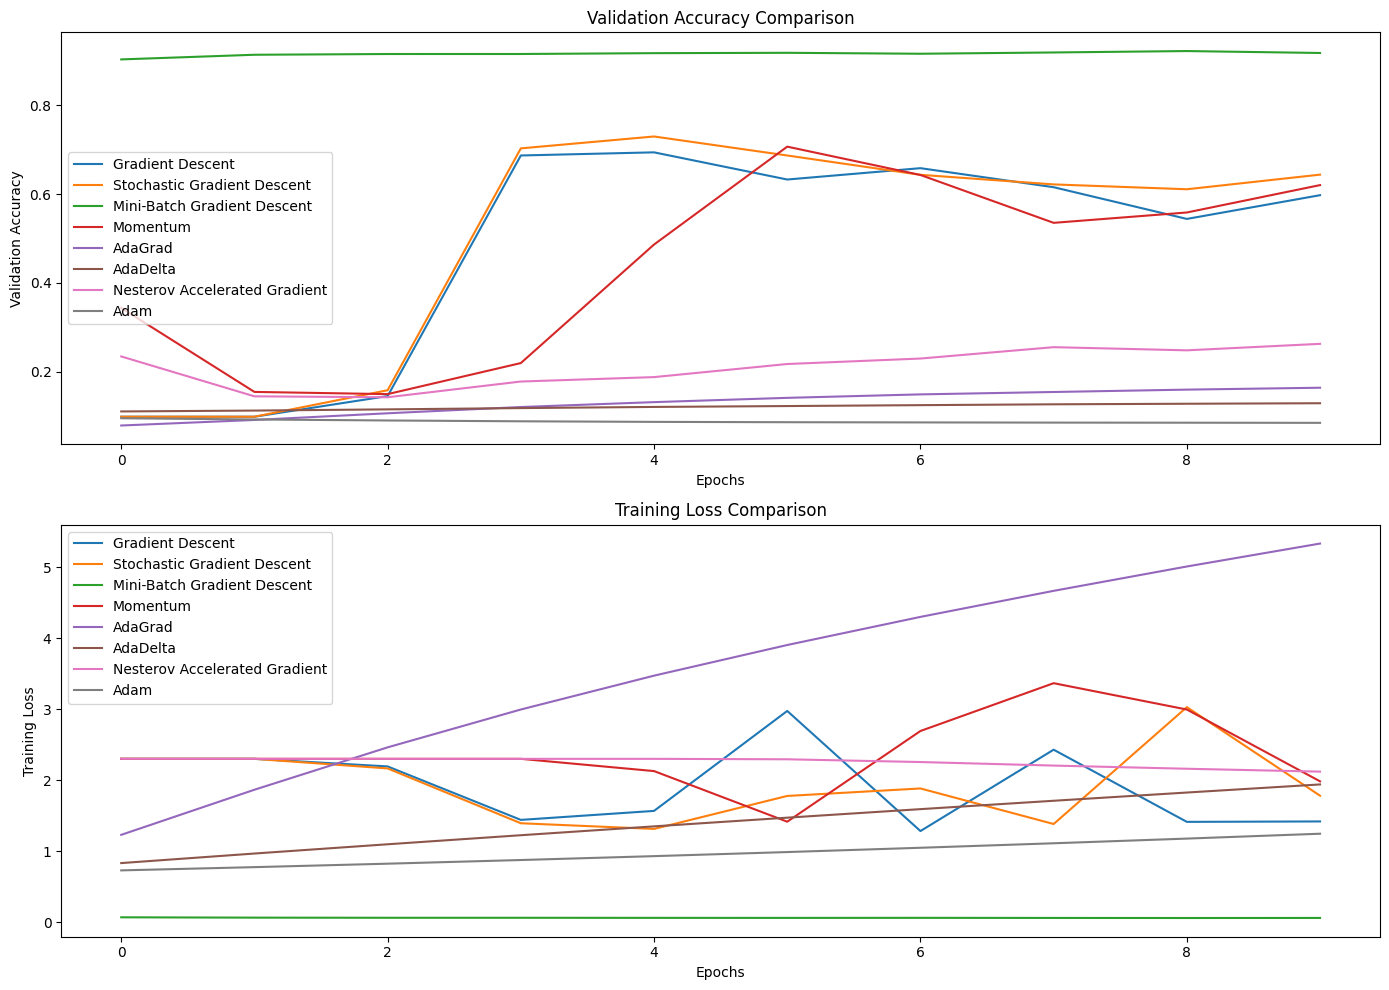

In [ ]:
plt.figure(figsize=(14, 10))

# Validation Accuracy
plt.subplot(2, 1, 1)
for name, history in history_dict.items():
    plt.plot(history['accuracy'], label=name)
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

#Training Loss
plt.subplot(2, 1, 2)
for name, history in history_dict.items():
    plt.plot(history['loss'], label=name)
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()